In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from numpy import linalg as LA
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\WesleyZhou\\Desktop\\CS559\\Assignment2\\iris.txt', header = None)

In [3]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data[4])
y = label_encoder.transform(data[4])

cols = [0,1,2,3]
X = data[cols].values

In [4]:
def LDA(first,second,X,y):
    #mean vectors for 2 classes
    mean_vector = []
    for i in [first,second]:
        mean_vector.append(np.mean(X[y == i],axis = 0))
    
    #within-class scatter matrix
    S_W = np.zeros((4,4))
    for classes,mean_vec in zip([first,second], mean_vector):
        class_sc_matrix = np.zeros((4,4))
        for data in X[y == classes]:
            data = data.reshape(4,1)
            mean_vec = mean_vec.reshape(4,1)
            class_sc_matrix += (data-mean_vec).dot((data-mean_vec).T)
        S_W += class_sc_matrix
        
    for mean_vec in mean_vector:
        class_sc_matrix = np.zeros((4,4))
        
    
    #between-class matrix
    mean_Class_1 = mean_vector[0].reshape(4,1)
    mean_Class_2 = mean_vector[1].reshape(4,1)
    
#     mean_Class_1 = mean_vector[0].T
#     mean_Class_2 = mean_vector[1].T
    S_B  = (mean_Class_1-mean_Class_2).dot((mean_Class_1-mean_Class_2).T)
    
    w = np.linalg.inv(S_W).dot(mean_Class_1-mean_Class_2)
    return w

In [5]:
w_01 = LDA(0,1,X,y)
w_02 = LDA(0,2,X,y)
w_03 = LDA(1,2,X,y)

In [6]:
w_01

array([[ 0.0290458 ],
       [ 0.1878948 ],
       [-0.21665059],
       [-0.33254958]])

In [7]:
w_02

array([[ 0.16002388],
       [ 0.12571911],
       [-0.37116266],
       [-0.38078412]])

In [8]:
w_03

array([[ 0.0362888 ],
       [ 0.0569247 ],
       [-0.07112375],
       [-0.12638818]])

In [9]:
y_01 = X.dot(w_01) 
y_02 = X.dot(w_02)
y_12 = X.dot(w_03)

In [10]:
y_test = np.zeros(150)
y_test = y_test.reshape(150,1)

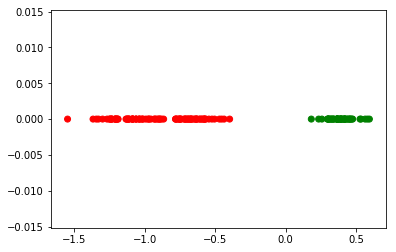

In [11]:
colors1 = []
for val in y_01:
    if val < 0:
        colors1.append('red')
    else:
        colors1.append('green')
plt.scatter(x=y_01, y=y_test,c=colors1)

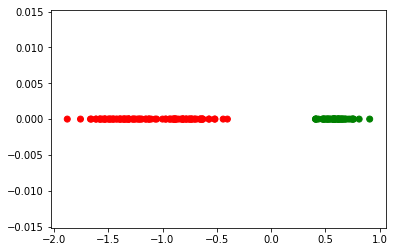

In [12]:
colors2 = []
for val in y_02:
    if val < 0:
        colors2.append('red')
    else:
        colors2.append('green')
plt.scatter(x=y_02, y=y_test,c=colors2)

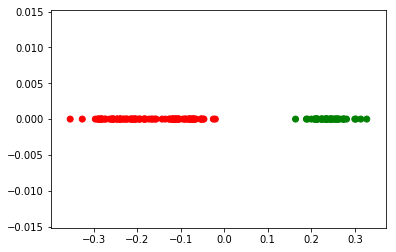

In [13]:
colors3 = []
for val in y_12:
    if val < 0:
        colors3.append('red')
    else:
        colors3.append('green')
plt.scatter(x=y_12, y=y_test,c=colors3)

In [ ]:
# Report

In [ ]:
# 1 i need to encode the class into 0,1,2 which represent the three classes
# 2 i choose each pair of the classes and calculate the mean with correponding features
# 3 i use mean of two class to calculate the within class scatter matrix and between class scatter matrix
# 4 i use inversed within class scatter matrix and mean of two class to calculate the w of each pair of classes
# 5 the plot shows the distribution of separated dataset based on corresponding w